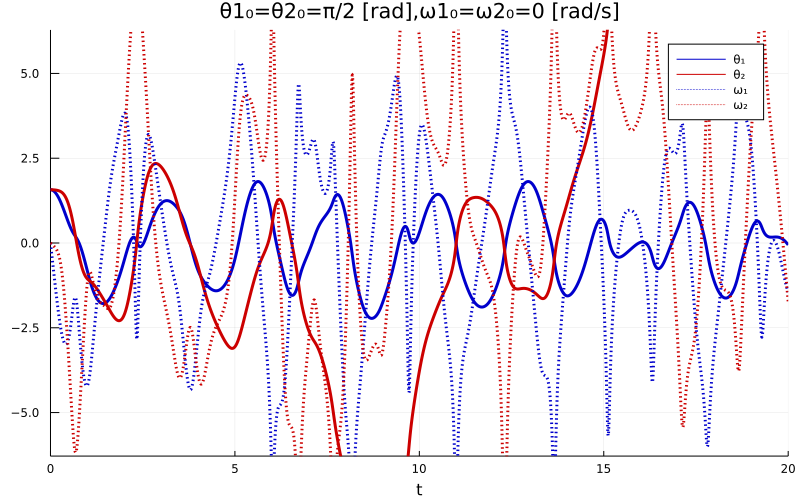

In [3]:
#May 26th, 2021
#n重振り子を解きたいJulia

using LinearAlgebra,DifferentialEquations,Plots,StaticArrays

#parameters
n  = 2     # 個
g  = 9.8   # m/s²
Δl = 0.0   # m
Δm = 0.0   # kg
p = (;n, g, Δl, Δm)

function Npendulum(du, u, p, t)
    n,g,Δl,Δm = p
    L = []
    M = []
    U = -ones(n)
    
#setting of L,M
for ii=1:n
    lᵢ = 1.0 + ii*Δl
    mᵢ = 1.0 + ii*Δm
    push!(L, lᵢ)
    push!(M, mᵢ)
end

#係数行列Aの初期化
A = zeros(n,n)
    #対角成分
        for i=1:n
            Mᵢᵢ = 0.0
            for j=i:n
                Mᵢᵢ += M[j]
            end
            A[i,i] = L[i]*L[i]*Mᵢᵢ
        end    
    #非対角成分
        for i=1:n
            for j=(i+1):n
                Mᵢⱼ = 0.0
                for k=j:n
                    Mᵢⱼ += M[k]
                end
            A[i,j] = L[i]*L[j]*cos(u[i]-u[j])*Mᵢⱼ
            A[j,i] = A[i,j]
            end
        end    
#係数行列Bの初期化
B = zeros(n,n)
    #対角成分
        for i=1:n
            Mᵢᵢ = 0.0
            for j=i:n
                Mᵢᵢ += M[j]
            end
            B[i,i] = g*L[i]*sin(u[i])*Mᵢᵢ
        end
    #非対角成分
        for i=1:n
            for j=(i+1):n
                Mᵢⱼ = 0.0
                for k=j:n
                    Mᵢⱼ += M[k]
                end
            B[i,j] = L[i]*L[j]+u[n+j]^2*sin(u[i]-u[j])*Mᵢⱼ
            B[j,i] = L[j]*L[i]+u[n+i]^2*sin(u[j]-u[i])*Mᵢⱼ
            end
        end
    F = A\B*U
    #運動方程式
    for i=1:n
        du[i] = u[n+i]  #dθᵢ=ωᵢ
        du[n+i] = F[i]  #dωᵢ=Fᵢ
    end
end

# Plots setups #
    Sol = []
    Plt = []
    Lx = 20.0
    Ly = 2*pi
    dcolor = 0.1
###############

#initial conditions : u₀[i]=θᵢ,u₀[n+i]=ωᵢ
for ii=1:1
    θ = [pi/2.0 for i=1:n]
    ω = [0.0 for i=1:n]
    u₀ = [θ ; ω]
    tinterval = (0.0,Lx)

    prob2 = ODEProblem(Npendulum,u₀,tinterval,p)
    sol = solve(prob2, Tsit5(), reltol=1e-8, abstol=1e-8)
    
    push!(Sol, sol)

    plt = plot(Sol[ii], lw=3,
               xlim = (0.0, Lx),ylim = (-Ly,Ly),
               title="θ1₀=θ2₀=π/2 [rad],ω1₀=ω2₀=0 [rad/s]",
               linestyle = [:solid :solid :dot :dot],
               lc = [RGB(0.0,0.0,dcolor*8) RGB(dcolor*8,0.0,0.0) RGB(0.0,0.0,dcolor*8) RGB(dcolor*8,0.0,0.0)],
               label = ["θ₁" "θ₂" "ω₁" "ω₂"]
        )
    push!(Plt, plt)
end

xlength = 800
ylength = 500

plot(Plt...; size=(xlength,ylength))